<a href="https://colab.research.google.com/github/Katinder/hello-world/blob/master/CAworking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!unzip -uq "/content/drive/My Drive/fooddataset/fooddataset2" -d "/content/drive/My Drive/fooddataset/fooddataset2"

Already unzipped

In [0]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import random
import gc

In [0]:
dir_path="/content/drive/My Drive/fooddataset/fooddataset2/dataset2"

In [0]:
import os
print(os.listdir(dir_path))

['testing', 'training', 'testing2.zip', 'testing2']


In [0]:
trainpath="/content/drive/My Drive/fooddataset/fooddataset2/dataset2/training"
testpath="/content/drive/My Drive/fooddataset/fooddataset2/dataset2/testing2"

In [0]:
strain=['/content/drive/My Drive/fooddataset/fooddataset2/dataset2/training/{}'.format(i) for i in os.listdir(trainpath) if 's' in i]
ptrain=['/content/drive/My Drive/fooddataset/fooddataset2/dataset2/training/{}'.format(i) for i in os.listdir(trainpath) if 'p (' in i]
#fftrain=['/content/drive/My Drive/fooddataset/fooddataset2/dataset2/training/{}'.format(i) for i in os.listdir(trainpath) if 'ff' in i]

testimgs=['/content/drive/My Drive/fooddataset/fooddataset2/dataset2/testing2/{}'.format(i) for i in os.listdir(testpath)]

Will need to do one hot encoding for more than two classes.
Change activation function of last dense layer to softmax.
And use categorical_crossentropy for loss instead of binary_crossentropy 

In [0]:
print(len(strain),len(ptrain))
#,len(fftrain))

800 800


In [0]:
for ob in ptrain:
  print(ob)

In [0]:
trainimgs=strain+ptrain
#+fftrain
#trainimgs.extend(fftraibutn)

In [0]:
print(len(trainimgs))

1600


In [0]:
random.shuffle(trainimgs)

In [0]:
random.shuffle(testimgs)

In [0]:
for ob in trainimgs:
  print(ob)

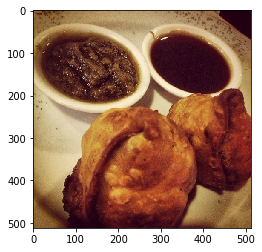

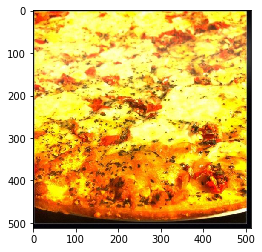

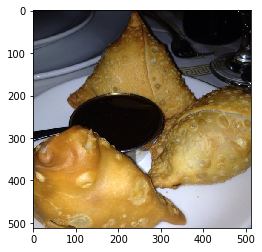

In [0]:
import matplotlib.image as mpimg
for im in trainimgs[0:3]:
    img=mpimg.imread(im)
    imgplot=plt.imshow(img)
    plt.show()

In [0]:
rows=150
col=150
channels=3

In [0]:
def readprocessimage(listofimages):
    x=[] #images
    y=[] #labels
    
    for img in listofimages:
        image=cv2.imread(img,flags=cv2.IMREAD_COLOR)
        resized=cv2.resize(image,(rows,col),interpolation=cv2.INTER_CUBIC)
        x.append(resized)
        #print(img)
        if "/fooddataset/fooddataset2/dataset2/training/s" in img:
            y.append(0)
        elif "/fooddataset/fooddataset2/dataset2/training/p" in img:
            y.append(1)
        #elif "/fooddataset/fooddataset2/dataset2/training/ff" in img:
         #   y.append(2)
        #print(y)
    return x,y

In [0]:
x,y=readprocessimage(trainimgs)

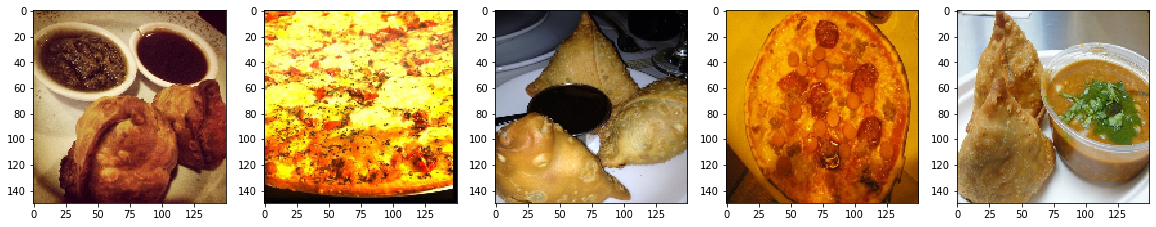

In [0]:
plt.figure(figsize=(20,10))
cols=5
for i in range(cols):
    plt.subplot(5/ cols+1, cols, i+1)
    rgb = cv2.cvtColor(x[i], cv2.COLOR_BGR2RGB)
    pixels = np.array(rgb)
    im=plt.imshow(pixels)

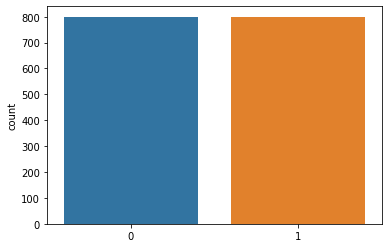

In [0]:
import seaborn as sns
#gc.collect()

x=np.array(x)
y=np.array(y)

sns.countplot(y)


In [0]:
print("train image shape: ",x.shape)
print("label shape: ",y.shape)

train image shape:  (1600, 150, 150, 3)
label shape:  (1600,)


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

print("train image shape: ",x_train.shape)
print("test image shape: ",x_test.shape)
print("train label shape: ",y_train.shape)
print("test label shape: ",y_test.shape)

train image shape:  (1280, 150, 150, 3)
test image shape:  (320, 150, 150, 3)
train label shape:  (1280,)
test label shape:  (320,)


In [0]:
ntrain=len(x_train)
ntest=len(x_test)

bacthsize=32

In [0]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [0]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [0]:
datagenerator=ImageDataGenerator(rescale=1./255,rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

val_datagen=ImageDataGenerator(rescale=1./255)

In [0]:
train_generator=datagenerator.flow(x_train,y_train,batch_size=bacthsize)
val_generator=val_datagen.flow(x_test,y_test,batch_size=bacthsize)

In [0]:
history=model.fit_generator(train_generator,steps_per_epoch=ntrain//bacthsize,epochs=32,validation_data=val_generator, validation_steps=ntest//bacthsize)

Epoch 1/32
40/40 [==============================] - 65s 2s/step - loss: 0.6809 - acc: 0.5641 - val_loss: 0.6132 - val_acc: 0.7500
Epoch 2/32
40/40 [==============================] - 64s 2s/step - loss: 0.6156 - acc: 0.6492 - val_loss: 0.5788 - val_acc: 0.6344
Epoch 3/32
40/40 [==============================] - 65s 2s/step - loss: 0.5547 - acc: 0.7188 - val_loss: 0.4356 - val_acc: 0.8156
Epoch 4/32
40/40 [==============================] - 64s 2s/step - loss: 0.5291 - acc: 0.7461 - val_loss: 0.3948 - val_acc: 0.8219
Epoch 5/32
40/40 [==============================] - 65s 2s/step - loss: 0.5057 - acc: 0.7492 - val_loss: 0.3773 - val_acc: 0.8344
Epoch 6/32
40/40 [==============================] - 63s 2s/step - loss: 0.4631 - acc: 0.7836 - val_loss: 0.4593 - val_acc: 0.8031
Epoch 7/32
40/40 [==============================] - 63s 2s/step - loss: 0.4542 - acc: 0.7984 - val_loss: 0.3175 - val_acc: 0.8719
Epoch 8/32
40/40 [==============================] - 64s 2s/step - loss: 0.4170 - acc: 0.81

In [0]:
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

In [0]:
#for p in testimgs:
#  print(p)

In [0]:
x_test,y_test=readprocessimage(testimgs[0:10])
x=np.array(x_test)
test_datagen=ImageDataGenerator(rescale=1./255)

In [0]:
#plt.figure(figsize=(20,10))
#cols=5
#for i in range(10):
#    plt.subplot(5/ cols+1, cols, i+1)
#    plt.imshow(x[i])

[[0.9995733]]
[[0.9684214]]
[[0.83931303]]
[[0.87758803]]
[[0.9967896]]
[[0.99808335]]
[[0.9895181]]
[[0.50802547]]
[[0.76444757]]
[[0.8286831]]


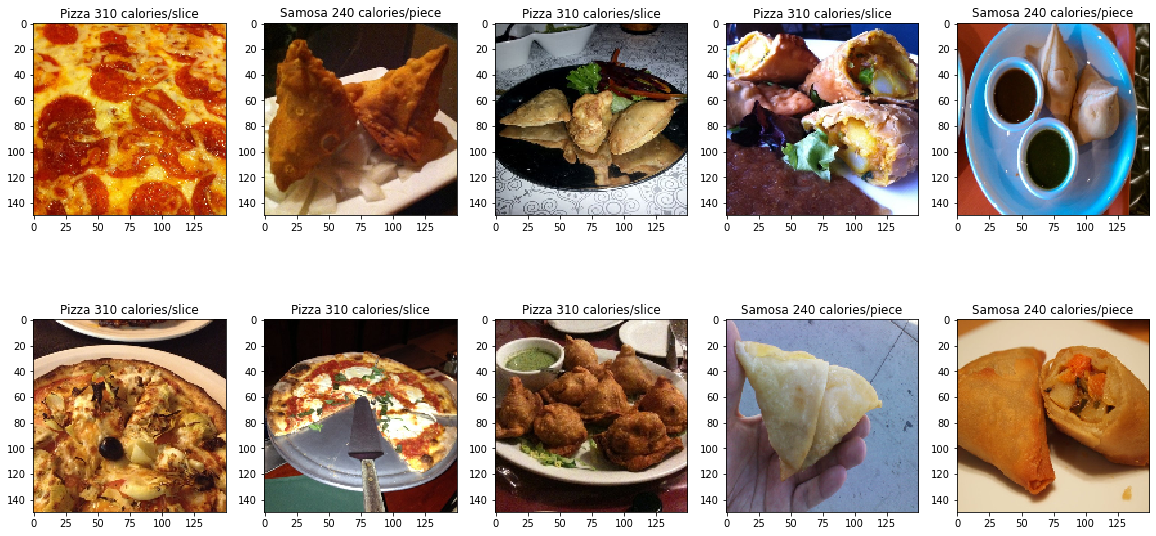

In [0]:
i=0
textlabels=[]
calorielabels=[]
plt.figure(figsize=(20,10))
for batch in test_datagen.flow(x,batch_size=1):
    pred=model.predict(batch)
    if pred>0.5:
        textlabels.append('Pizza')
        calorielabels.append(' 310 calories/slice')
        print(pred)
    else:
        textlabels.append('Samosa')
        calorielabels.append(' 240 calories/piece')
        print(1-pred)
    plt.subplot(5/ cols+1, cols, i+1)
    plt.title(textlabels[i]+calorielabels[i])
    #plt.title(calorielabels[i])
    rgb = cv2.cvtColor(batch[0], cv2.COLOR_BGR2RGB)
    pixels = np.array(rgb)
    im=plt.imshow(pixels)
    i=i+1
    if i%10 ==0:
        break
plt.show()

### **Loading the saved model and testing for given image**

In [0]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('/content/drive/My Drive/CA/Model/BinaryClassification/model_keras.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
testpath="/content/drive/My Drive/st (159).jpg"

In [0]:
img = cv2.imread(testpath)
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

p=model.predict(img)
print('Predicted: ')
if p>0.5:
  print('Pizza with probability',(p[0][0])*100, '%')
elif p<0.5 and p>=0:
  print('Samosa with probability',(1-p[0][0])*100, '%')

classes = model.predict_classes(img)
print(classes)

Predicted: 
Samosa with probability 100.0 %
[[0]]
